In [162]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
plt.rcParams['font.family'] = 'Helvetica'

In [58]:
results = pd.read_csv("./pct_outputs.csv",  encoding="ISO-8859-1", header=0, index_col=0)

In [59]:
candidates = results.columns
data = results.values
mean_vec = np.mean(data, axis=1)

data = np.subtract(data, mean_vec[:, np.newaxis])
u, s, vh = np.linalg.svd(data, full_matrices=False)

In [61]:
keep_dim = 2
reduced = u[:,:keep_dim] @ np.diag(s[:keep_dim]) @ vh[:keep_dim,]

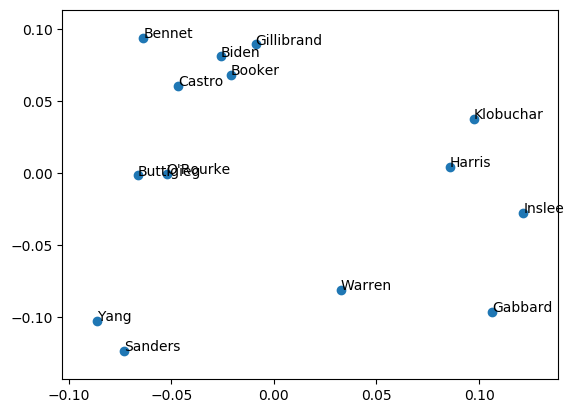

In [163]:
plt.scatter(reduced[0, :], reduced[1, :])
for i, name in enumerate(candidates):
    plt.annotate(name, (reduced[0][i], reduced[1][i]))

### Visualization

In [107]:
# These are the tableau20 colors
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

# Scaling colors to mpl format
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = [r / 255., g / 255., b / 255.]
    
polling = np.array([29.0, 15.4, 15.8, 7.4, 4.6, 3.4, 2.2, 1.4, 1.4, 0.8, 0.0, 0.2, 1.4, 2.0])

round_25 = lambda x: np.round(x*4)/4
alphas = round_25(polling / max(polling) + 0.125)


rgba_colors = np.zeros((len(candidates),4))
# for red the first column needs to be one
rgba_colors[:,:3] = tableau20[0].copy()
# the fourth column needs to be your alphas
rgba_colors[:, 3] = alphas

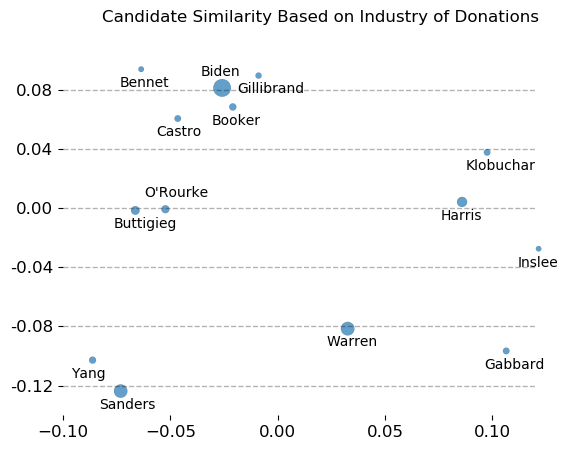

In [192]:
# Aim for plot to be 4:3 ratio    
plt.figure(figsize=(1.33*5, 5))  

# Removing plot lines
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.xlim(-0.10, 0.14)    
plt.ylim(-0.14, 0.12)

fsize=12
plt.yticks(np.arange(-0.12, .12, 0.04), ["{0:.2f}".format(i) for i in np.arange(-0.12, .12, 0.04)], fontsize=fsize)    
plt.xticks(fontsize=fsize)

# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
for y in np.arange(-0.12, 0.12, 0.04):    
    plt.plot(np.linspace(-0.10, 0.12, 2), [y] * 2, "--", lw=0.99, color="black", alpha=0.3)        

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off",  right=False, top = False,   
                labelbottom="on", left="off",  labelleft="off")    


for i in range(len(candidates)):
    if candidates[i] == "Biden" or candidates[i] == "O'Rourke":
        position = [reduced[0,i] - 0.01, reduced[1, i] + 0.008]
    else:
        position = [reduced[0,i] - 0.01, reduced[1, i] - 0.012]
    plt.annotate(candidates[i], position)
#plt.scatter(reduced[0, :], reduced[1, :],  s=150, color="None", alpha=1.0, edgecolors='k')
plt.scatter(reduced[0, :], reduced[1, :],  
            s= (3 + polling) * 5, 
            color=tableau20[0], 
            alpha=0.7, 
            edgecolors='k',
            linewidths=0.1)

plt.title("Candidate Similarity Based on Industry of Donations")

plt.savefig("/Users/rdilip/Desktop/plot.png", dpi=150)